Hello, my name is Kamila. I am getting my master's degree in Data Science now and after 3 months of studies I decided to try my new-aquired skills on a Kaggle dataset. 

I admire Data Science for ability of learning new every day and opportunity of constantly challenging oneself.
Last 3,5 years I worked in cyber security, but apart from this I have a broad range of interests. For example, I am a huge fan of human brain. It's a masterpiece which we still didn't study as much as other parts of human body. I have high hopes that in the nearest future we will make fantastic discoveries in neuroscience.


// Disclaimer: I believe data scientists spend most of the time on aquiring and clening data (so do I on another project), but for the sake of practice here I am with "picard" dataset.


Today I bring your attention on Classification problem: "Eyes open/Eyes shut" based on time series of brain waves aquired during experiment conducted by Ben Latimer. Thank you Ben! https://www.kaggle.com/latimerb/eeg-leftright I have seen your work and it's truly impressive! I'm not here to copy-paste your work but rather try different approach in cleaning and building / training model. 

----- 

What we know: Brain is a highly-complex in its processes (group of) organ(s), driven by chemical reactions that create electromagnetic radiation. As electrical impulses differ of its origins and intensity so do the waves we can register. 

The experiment obtained alpha waves as they are known to have highest amplitude when we close eyes (in a dark room) and weaken when eyes are open. Exciting! Let's see what we can do with it.

In [732]:
import numpy as np #linear algebra
import pandas as pd #work with dataframes, quirtiles 
import matplotlib.pyplot as plt # we need for plotting
import scipy as scipy
import scipy.signal as signal  # for stats
import pylab as pylab # not sure yet lol

In [733]:
pwd #I'm sure but let's check anyway

'/Users/kamila/Downloads/archive'

In [734]:
df = pd.read_csv('OpenBCI-RAW-2020-03-10_08-53-44.txt',skiprows=6,header=None) #we import file with data

In [735]:
df.head() #first glance

,0,1,2,3,4,5,6,7,8,9
0,0,-76.20,1.38,-34.35,-51.09,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
1,1,-36.12,29.01,76.34,48.51,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
2,2,-43.59,31.42,58.11,30.55,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
3,3,-77.29,2.68,-19.45,-49.45,0.912,0.112,-0.464,08:54:30.274,1.583848e+12
4,4,-57.05,17.48,52.08,23.03,0.912,0.112,-0.464,08:54:30.274,1.583848e+12


In [ ]:
#lets get rid of missing values
#df.isna()

In [ ]:
#df = df.dropna() #lovely!

In [ ]:
# let's name columns according to the author 

In [736]:
df.columns=['index','channel1','channel2','channel3','channel4','acc1','acc2','acc3','time_std','timestamp']

In [737]:
df.head() #that's better

,index,channel1,channel2,channel3,channel4,acc1,acc2,acc3,time_std,timestamp
0,0,-76.20,1.38,-34.35,-51.09,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
1,1,-36.12,29.01,76.34,48.51,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
2,2,-43.59,31.42,58.11,30.55,0.912,0.112,-0.464,08:54:30.263,1.583848e+12
3,3,-77.29,2.68,-19.45,-49.45,0.912,0.112,-0.464,08:54:30.274,1.583848e+12
4,4,-57.05,17.48,52.08,23.03,0.912,0.112,-0.464,08:54:30.274,1.583848e+12


In [738]:
df.drop(['index'],axis=1,inplace=True) # we don't need index column twice, let's delete one

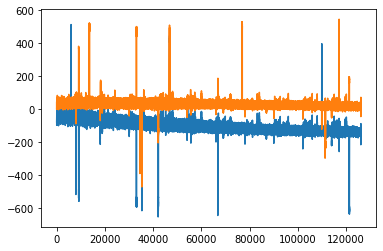

In [739]:
plt.figure()
plt.plot(df['channel1'])
plt.plot(df['channel2'])
#plt.plot(df['channel3'])
#plt.plot(df['channel4'])
# we have plotted columns that represent data gathered with 'channels' that's brain waves 
#we see general regression, it's not correct due to waves being constant. we need to remove this trend

In [740]:
df['channel1'] = ss.detrend(df['channel1'])
df['channel2'] = ss.detrend(df['channel2'])
df['channel3'] = ss.detrend(df['channel3'])
df['channel4'] = ss.detrend(df['channel4']) # we have used scipy library to detrend functions

"plt.plot(df['channel3'])\nplt.plot(df['channel4'])"

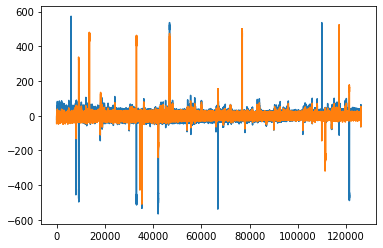

In [741]:
plt.plot(df['channel1'])
plt.plot(df['channel2'])
"""plt.plot(df['channel3'])
plt.plot(df['channel4'])"""

In [778]:
df['seconds_from_start']=(df['timestamp']-df['timestamp'].iloc[0])/1000

In [779]:
y_labels = np.zeros((df['time_std'].shape[0],1))

In [780]:
y_labels[(60<df.seconds_from_start)&(df.seconds_from_start<90)] = 1
y_labels[(120<df.seconds_from_start)&(df.seconds_from_start<150)] = 1
y_labels[(180<df.seconds_from_start)&(df.seconds_from_start<210)] = 1
y_labels[(240<df.seconds_from_start)&(df.seconds_from_start<270)] = 1
y_labels[(300<df.seconds_from_start)&(df.seconds_from_start<330)] = 1
y_labels[(360<df.seconds_from_start)&(df.seconds_from_start<390)] = 1
y_labels[(420<df.seconds_from_start)&(df.seconds_from_start<450)] = 1
y_labels[(480<df.seconds_from_start)&(df.seconds_from_start<510)] = 1
y_labels[(540<df.seconds_from_start)&(df.seconds_from_start<570)] = 1
y_labels[(600<df.seconds_from_start)&(df.seconds_from_start<630)] = 1

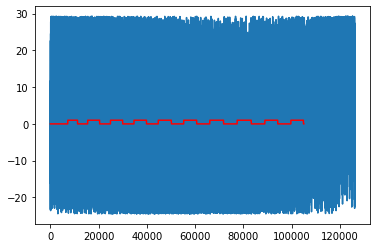

In [781]:
plt.plot(df["channel1"])
plt.plot(y_labels,'r')

In [ ]:
df = df.dropna() #lovely!

In [ ]:
plt.boxplot(df['channel1']) # There are outliers which in neuroscience they call artifacts. 
# both plot and boxplot show that there are outliers above and below the graph 

In [ ]:
# all the channels registered extreme values (outliers) in a perfect world they exactly indicate 
# on the impulse that is sent by brain in order to close eyes or open them
# but unfortunately we cannot assume it true as there might have been other impulses / external world waves etc
# can you imagine, even when we sweat our brain produces special "sweating" waves :) obviously.
# so let's try and remove outliers

In [776]:
q = df["channel1"].quantile(0.97)
df[df["channel1"] < q]
q_low = df["channel1"].quantile(0.03)
q_hi  = df["channel1"].quantile(0.97)

df = df[(df["channel1"] < q_hi) & (df["channel1"] > q_low)]
# I deided to remove outliers with quantiles 
# i increased value of quartiles from 99-1 to 90-10 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca458c61d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca458c2050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca458c6ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca458bc690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca458c1610>],
 'means': []}

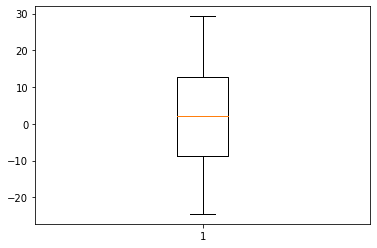

In [777]:
plt.boxplot(df['channel1'])

In [758]:
q = df["channel2"].quantile(0.99)
df[df["channel2"] < q]
q_low = df["channel2"].quantile(0.01)
q_hi  = df["channel2"].quantile(0.99)

df = df[(df["channel2"] < q_hi) & (df["channel2"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9fbe50990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca0247d110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9fbe50610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc9fbe47350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca04c81650>],
 'means': []}

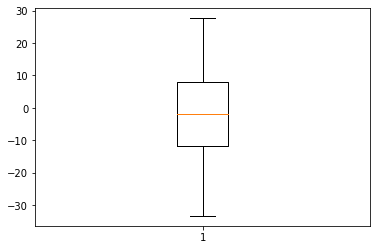

In [759]:
plt.boxplot(df['channel2'])

In [760]:
q = df["channel3"].quantile(0.99)
df[df["channel3"] < q]
q_low = df["channel3"].quantile(0.01)
q_hi  = df["channel3"].quantile(0.99)

df = df[(df["channel3"] < q_hi) & (df["channel3"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca1855b8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca180e3890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9fe9de850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc9fdf321d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca180fba50>],
 'means': []}

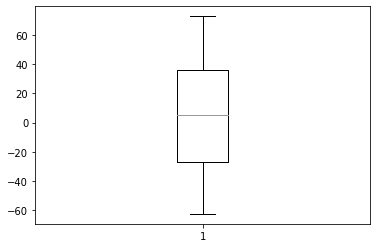

In [761]:
plt.boxplot(df['channel3'])

In [762]:
q = df["channel4"].quantile(0.99)
df[df["channel4"] < q]
q_low = df["channel4"].quantile(0.01)
q_hi  = df["channel4"].quantile(0.99)

df = df[(df["channel4"] < q_hi) & (df["channel4"] > q_low)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fca12f64690>,
 'caps': [<matplotlib.lines.Line2D at 0x7fca12f6f290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fca12f64a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fca12f71f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fca12f72c10>],
 'means': []}

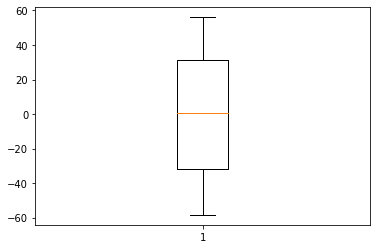

In [763]:
plt.boxplot(df['channel4'])

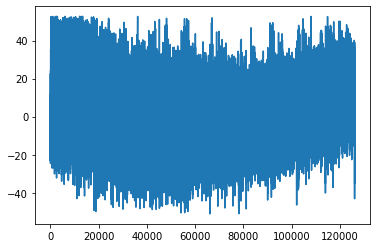

In [764]:
plt.plot(df['channel1']) #let's see how it looks on a plot

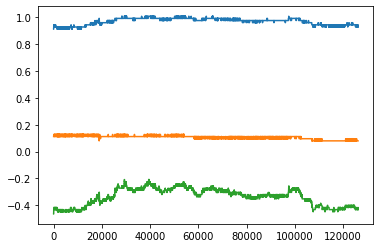

In [765]:
plt.plot(df['acc1'])
plt.plot(df['acc2'])
plt.plot(df['acc3']) # just wanted to check accelerators data, anyway that's not what we want to work with

In [ ]:
#let's label Y axis as author says every 30 seconds he was opening/closing eyes 

In [ ]:
plt.plot(df['channel1'])

In [ ]:
df['seconds_from_start']=(df['timestamp']-df['timestamp'].iloc[0])/1000

In [ ]:
y_labels = np.zeros((df['time_std'].shape[0],1))

In [ ]:
y_labels[(60<df.seconds_from_start)&(df.seconds_from_start<90)] = 1
y_labels[(120<df.seconds_from_start)&(df.seconds_from_start<150)] = 1
y_labels[(180<df.seconds_from_start)&(df.seconds_from_start<210)] = 1
y_labels[(240<df.seconds_from_start)&(df.seconds_from_start<270)] = 1
y_labels[(300<df.seconds_from_start)&(df.seconds_from_start<330)] = 1
y_labels[(360<df.seconds_from_start)&(df.seconds_from_start<390)] = 1
y_labels[(420<df.seconds_from_start)&(df.seconds_from_start<450)] = 1
y_labels[(480<df.seconds_from_start)&(df.seconds_from_start<510)] = 1
y_labels[(540<df.seconds_from_start)&(df.seconds_from_start<570)] = 1
y_labels[(600<df.seconds_from_start)&(df.seconds_from_start<630)] = 1

In [ ]:
plt.plot(df["channel1"])
plt.plot(y_labels,'r')

In [ ]:
channel1 = df['channel1']
channel2 = df['channel2']
channel3 = df['channel3']
channel4 = df['channel4']

In [ ]:
# Data cleaning isn't over! Let's remove also 60Hgz waves produced by power lines

In [ ]:
b, a = ss.iirnotch(60.0, 200.0, 200.)

channel1 = ss.filtfilt(b,a,channel1)

In [ ]:
channel2 = ss.filtfilt(b,a,channel2)
channel3 = ss.filtfilt(b,a,channel3)
channel4 = ss.filtfilt(b,a,channel4)

In [ ]:
channel1[np.abs(channel1)>3] = np.nan
channel2[np.abs(channel2)>3] = np.nan
channel3[np.abs(channel3)>3] = np.nan
channel4[np.abs(channel4)>3] = np.nan
y_labels[(np.abs(channel1)>3) | (np.abs(channel2)>3) | (np.abs(channel3)>3) | (np.abs(channel4)>3)] = np.nan

In [ ]:
channel1 = df['channel1']
channel2 = df['channel2']
channel3 = df['channel3']
channel4 = df['channel4']
df['y_labels'] = y_labels

In [ ]:
X = df['channel2'].iloc[y_labels[:,0]==0]
plt.psd(X[~np.isnan(X)],512,Fs=200,color='r')
X = df['channel2'].iloc[y_labels[:,0]==1]
plt.psd(X[~np.isnan(X)],512,Fs=200)
plt.xlim(0,100)
#plt.show()
plt.show()

In [ ]:
from scipy.integrate import simps
import scipy.stats as sst
from matplotlib.mlab import psd

def bandpower(trace,band):
    [a1,f1]=psd(trace[~np.isnan(trace)],512,Fs=200)
    total_power1 = simps(a1, dx=0.1)
    ap1 = simps(a1[(f1>band[0]) & (f1<band[1])], dx=0.1)
    return ap1/total_power1
    
input_mat = np.zeros((600,21))
c=0
for i in np.arange(0,120000,200):
    
    X1=df['channel1'];X2=df['channel2'];X3=df['channel3'];X4 = df['channel4']
    Y = df['y_labels']
    
    X1=X1[i:i+200];X2=X2[i:i+200];X3=X3[i:i+200];X4=X4[i:i+200]
    Y=Y[i:i+200]
    
    input_mat[c,0] = bandpower(X1,[8,12]);input_mat[c,1] = bandpower(X2,[8,12]);
    input_mat[c,2] = bandpower(X3,[8,12]);input_mat[c,3] = bandpower(X4,[8,12]);
    
    input_mat[c,4] = bandpower(X1,[3,8]);input_mat[c,5] = bandpower(X2,[3,8]);
    input_mat[c,6] = bandpower(X3,[3,8]);input_mat[c,7] = bandpower(X4,[3,8]);
    
    input_mat[c,8] = bandpower(X1,[12,38]);input_mat[c,9] = bandpower(X2,[12,38]);
    input_mat[c,10] = bandpower(X3,[12,38]);input_mat[c,11] = bandpower(X4,[12,38]);
    
    input_mat[c,12] = bandpower(X1,[38,100]);input_mat[c,13] = bandpower(X2,[38,100]);
    input_mat[c,14] = bandpower(X3,[38,100]);input_mat[c,15] = bandpower(X4,[38,100]);
    
    input_mat[c,16] = bandpower(X1,[0.5,3]);input_mat[c,17] = bandpower(X2,[0.5,3]);
    input_mat[c,18] = bandpower(X3,[0.5,3]);input_mat[c,19] = bandpower(X4,[0.5,3]);
    
    [u,n] = np.unique(Y,return_counts=True)
    if n.shape[0]==1:
        input_mat[c,-1] = u[0].astype(int)
    else:
        input_mat[c,-1] = np.nan
        
    c+=1

feat_eng_df = pd.DataFrame(input_mat, columns = ['alpha_power_1','alpha_power_2','alpha_power_3','alpha_power_4',
                                                 'theta_power_1','theta_power_2','theta_power_3','theta_power_4',
                                                 'beta_power_1','beta_power_2','beta_power_3','beta_power_4',
                                                 'gamma_power_1','gamma_power_2','gamma_power_3','gamma_power_4',
                                                 'delta_power_1','delta_power_2','delta_power_3','delta_power_4',
                                                 'eyes_closed'])

In [ ]:
import seaborn as sns
sns.boxplot(x='eyes_closed',y='alpha_power_3',data=feat_eng_df)

In [ ]:
from sklearn.preprocessing import scale

train_df = feat_eng_df.iloc[0:420,:]
test_df = feat_eng_df.iloc[420:,:]

train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

X_train = X_train[~np.isnan(y_train)]
y_train = y_train[~np.isnan(y_train)]
X_test = X_test[~np.isnan(y_test)]
y_test = y_test[~np.isnan(y_test)]


X_train = scale(X_train)
X_test = scale(X_test)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:

svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

In [ ]:
y_pred1 = svclassifier.predict(X_test)
y_pred1 = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
svclassifier1 = SVC(kernel='sigmoid')
svclassifier1.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred1))

print(classification_report(y_test, y_pred1))

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
df_train = df[df.seconds_from_start<=420]
df_test = df[df.seconds_from_start>420]

In [ ]:
df_train.head()

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook

window_size = 50
stride=20

df_class_train = np.zeros((int(df_train.shape[0]/stride),window_size+1,4))
c=0
for i in tqdm_notebook(np.arange(0,df_train.shape[0]-window_size,stride)):
    df_class_train[c,0:window_size,0] = df_train['channel1'].iloc[i:i+window_size]
    df_class_train[c,0:window_size,1] = df_train['channel2'].iloc[i:i+window_size]
    df_class_train[c,0:window_size,2] = df_train['channel3'].iloc[i:i+window_size]
    df_class_train[c,0:window_size,3] = df_train['channel4'].iloc[i:i+window_size]
        
    ylabs = df_train[y_labels].iloc[i:i+window_size]
    ones=ylabs[ylabs==1]
    zeros=ylabs[ylabs==0]
    
    if ones.shape[0]>zeros.shape[0]:
        df_class_train[c,-1,:] = 1
    else:
        df_class_train[c,-1,:] = 0
    c+=1
    
df_class_test = np.zeros((int(df_test.shape[0]/stride),window_size+1,4))
c=0
for i in tqdm_notebook(np.arange(0,df_test.shape[0]-window_size,stride)):
    df_class_test[c,0:window_size,0] = df_test['channel1'].iloc[i:i+window_size]
    df_class_test[c,0:window_size,1] = df_test['channel2'].iloc[i:i+window_size]
    df_class_test[c,0:window_size,2] = df_test['channel3'].iloc[i:i+window_size]
    df_class_test[c,0:window_size,3] = df_test['channel4'].iloc[i:i+window_size]
    
    ylabs = df_test['y_labels'].iloc[i:i+window_size]
    ones=ylabs[ylabs==1]
    zeros=ylabs[ylabs==0]
    
    if ones.shape[0]>zeros.shape[0]:
        df_class_test[c,-1,:] = 1
    else:
        df_class_test[c,-1,:] = 0
    c+=1
    
    

In [ ]:
df_class_train.shape,df_class_test.shape

In [ ]:
import pywt
import matplotlib.pyplot as plt

def split_indices_per_label(y):
    indicies_per_label = [[] for x in range(0,6)]
    # loop over the six labels
    for i in range(6): 
        indicies_per_label[i] = np.where(y == i)[0]
    return indicies_per_label

def plot_cwt_coeffs_per_label(X, label_indicies, label_names, signal, sample, scales, wavelet):
    
    fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(12,5))
    
    for ax, indices, name in zip(axs.flat, label_indicies, label_names):
        # apply  PyWavelets continuous wavelet transfromation function
        coeffs, freqs = pywt.cwt(X[indices[sample],:, signal], scales, wavelet = wavelet)
        # create scalogram
        ax.imshow(coeffs, cmap = 'coolwarm', aspect = 'auto')
        ax.set_title(name)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_ylabel('Scale')
        ax.set_xlabel('Time')
    plt.tight_layout()

# list of list of sample indicies per activity
train_labels_indicies = split_indices_per_label(y_train)

#signal indicies: 0 = body acc x, 1 = body acc y, 2 = body acc z, 3 = body gyro x, 4 = body gyro y, 5 = body gyro z, 6 = total acc x, 7 = total acc y, 8 = total acc z
signal = 3 # signal index
sample = 1 # sample index of each label indicies list
scales = np.arange(1, 65) # range of scales
wavelet = 'morl' # mother wavelet

plot_cwt_coeffs_per_label(X_train, train_labels_indicies, LABEL_NAMES, signal, sample, scales, wavelet)